In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Importing the Required Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Step1: Loading the Dataset

In [3]:
import pandas as pd

df = pd.read_csv('/kaggle/input/titanic/train.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* # Exploring Data

In [4]:
df.shape

(891, 12)

This dataset contains 891 rows and 12 columns.

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Looks like there are missing values in the columns: 'Age', 'Cabin' and 'Embarked'.

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


By examining the output of `df.describe()`, we noticed potential outliers in the `Age` and `Fare` columns:

- **Age Column:**
  - Mean: 29.70
  - Max: 80.0
  - 75th Percentile: 38.0
  - Since the maximum age (80) is significantly higher than the 75th percentile (38), this suggests the presence of potential outliers in older age groups.

- **Fare Column:**
  - Mean: 32.20
  - Max: 512.33
  - 75th Percentile: 31.0
  - The maximum fare is extremely high compared to the upper quartile, indicating a strong presence of high-value outliers.

We will look these outliers in the visualization part.

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Step2: Data Cleaning (Missing Values, Duplicates, Outliers)

* # Handling Missing Values 

First look for the number of missing values in each column.

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Filling values in the 'Age' column**

In [10]:
df['Age'].fillna(df['Age'].median(), inplace=True)

/tmp/ipykernel_31/1933487976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


**Filling values in the 'Embarked' column**

In [11]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

/tmp/ipykernel_31/3744086084.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


**For Cabin Column**

There are plenty of null values in this column so it is not a good idea to fill these values so we gonna drop this column.

In [12]:
df.drop(columns=['Cabin'], inplace=True)

Now again check for null values

In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

As there are no missing values so we are good to go.

* # Handling Duplicate Values

**Checking duplicate values**

In [14]:
df.duplicated().sum()

0

As there are no duplicate so we are good to go

* # Handling Outliers 

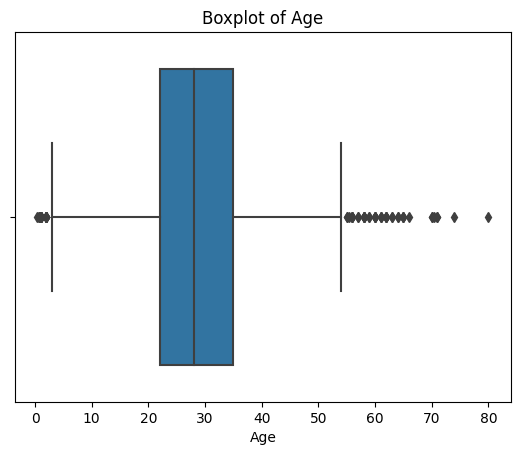

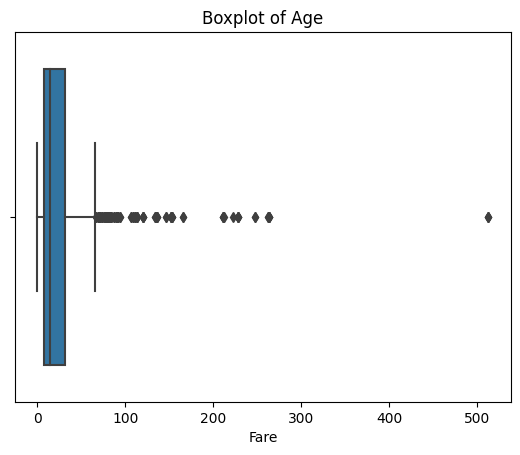

In [15]:
# Age Outliers
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')
plt.show()

# Fare Outliers
sns.boxplot(x=df['Fare'])
plt.title('Boxplot of Age')
plt.show()

- Outliers in `Fare` and `Age` are identified via boxplots.
- Since they appear to be valid (not errors), we chose to retain them.
- However, we may apply transformation during modeling to reduce skewness.

We are done with the cleaning part and we gonna proceed further.

# Step3 : Visualizations

In [ ]:
In this step, we analyze the dataset using various visualizations.
Graphical representations help us:

Understand the data more intuitively
Detect hidden patterns that may not be obvious in tabular format
Derive meaningful insights for further analysis and modeling

📌 Plan for this Step:
* Bar Charts – To explore the distribution of categorical features 
(e.g., gender, class, embarkation point)
* Histograms – To visualize the distribution of numeric columns 
(e.g., age, fare)
* Correlation Heatmap – To examine the relationships between numeric 
variables and detect potential multicollinearity

These visualizations form the backbone of our exploratory data analysis 
(EDA) and help in understanding the structure and behavior of the dataset 
before modeling.

* # Bar Charts for Categorical Variables 

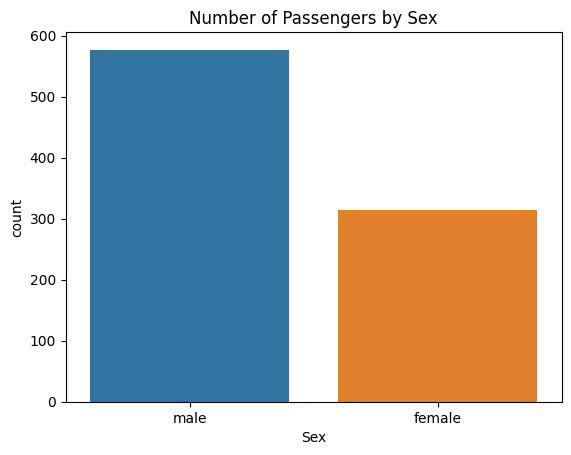

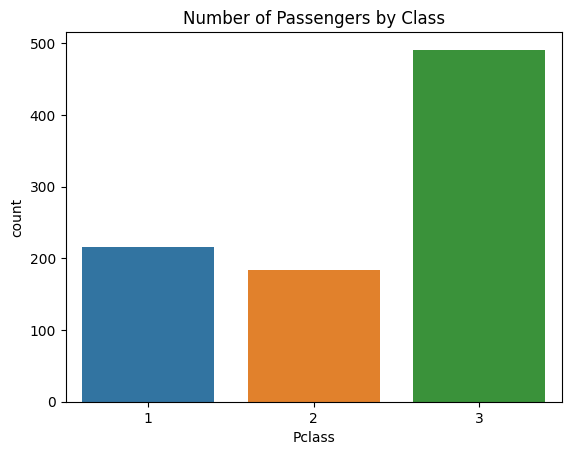

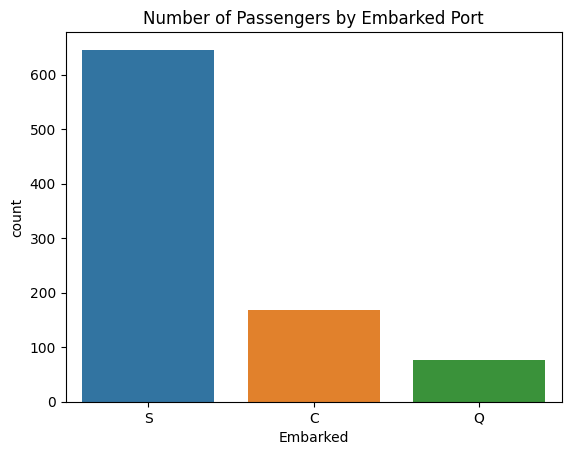

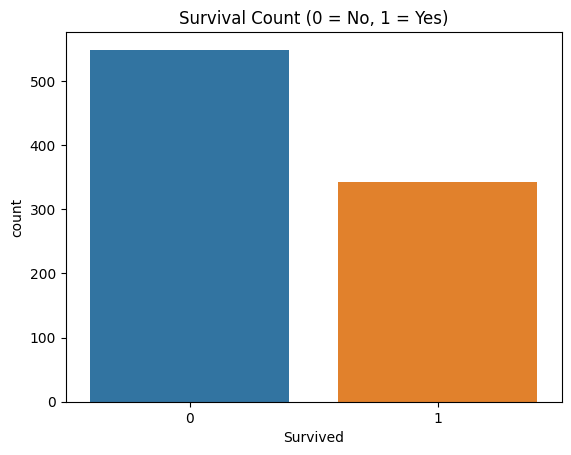

In [16]:
# 1. Sex Distributions
sns.countplot(x='Sex', data=df)
plt.title("Number of Passengers by Sex")
plt.show()

# 2. Passenger Class
sns.countplot(x='Pclass', data=df)
plt.title("Number of Passengers by Class")
plt.show()

# 3. Embarked Ports
sns.countplot(x='Embarked', data=df)
plt.title("Number of Passengers by Embarked Port")
plt.show()

# 4. Survived vs Not Survived
sns.countplot(x='Survived', data=df)
plt.title("Survival Count (0 = No, 1 = Yes)")
plt.show()

### Insights from Bar Charts (Categorical Variables)

**1. Gender Distribution:**
- The dataset is male-dominated, with approximately 580 male passengers and 305 female passengers.

**2. Passenger Class (Pclass):**
- The majority of passengers belonged to 3rd class (~490), followed by 1st class (~215) and 2nd class (~195).
- This suggests that the ship was carrying more economically lower-class individuals.

**3. Embarkation Port (Embarked):**
- Most passengers (~640) embarked from Port S (Southampton), followed by Port C (~175) and Port Q (~80).
- Southampton was the primary port of boarding.

**4. Survival Status:**
- Around 565 passengers did not survive, while approximately 340 passengers survived.
- This shows that the majority of people on board perished in the disaster.


* # Histograms for Numeric Distributions

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


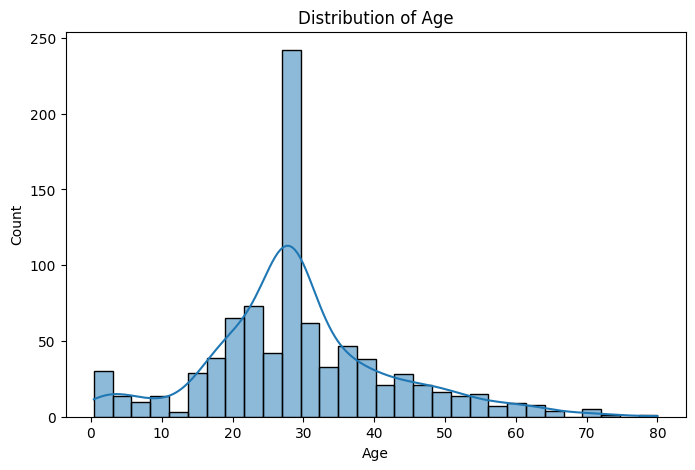

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


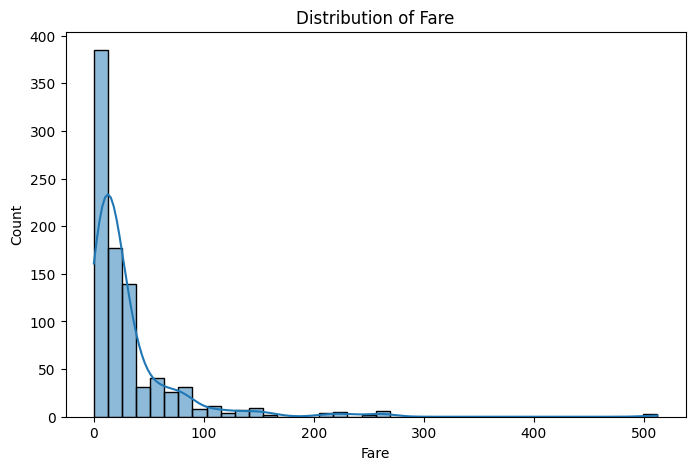

In [17]:
# Age ka Histogram
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Fare ka Histogram
plt.figure(figsize=(8,5))
sns.histplot(df['Fare'], kde=True, bins=40)
plt.title("Distribution of Fare")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

### Histogram Insights

**1. Age Distribution:**
- Most passengers were between 20 and 40 years old.
- A sharp peak is observed around age 29-30, which might be due to imputed missing values.
- Very few passengers were over 65. The distribution is slightly right-skewed.
- Fewer children (0–10 age group) were onboard.

**2. Fare Distribution:**
- Majority of the passengers paid fares below 50.
- The distribution is highly skewed to the right with several extreme outliers.
- These high fares might correspond to first-class passengers.
-  These high values are outliers.

* # Correlation Heatmap 

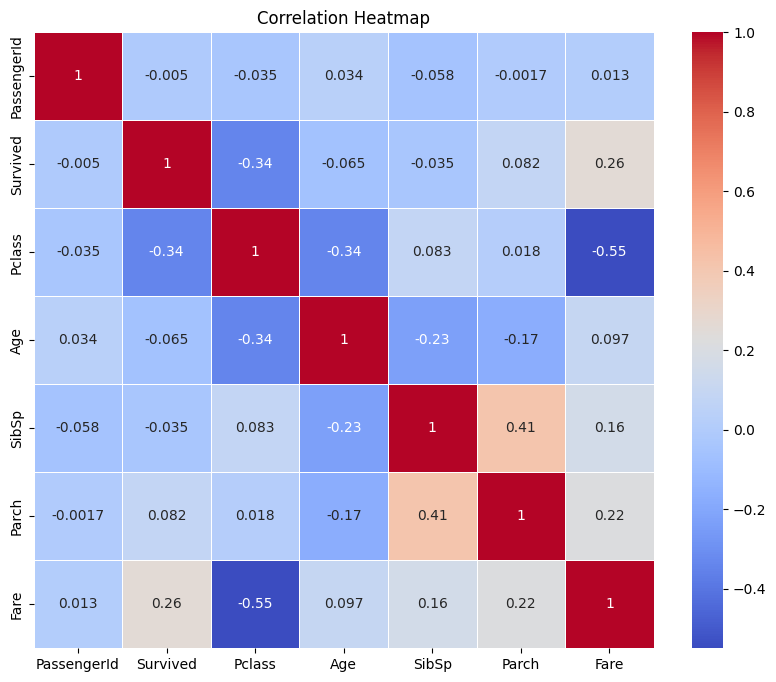

In [18]:
# Correlation matrix banana
corr_matrix = df.corr(numeric_only=True)

# Heatmap plot karna
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

**Insights of features relation**
1. Higher-class passengers paid more fare (Pclass vs Fare: -0.55)
2. Passengers who paid more had higher survival chances (Fare vs Survived: +0.26)
3. First-class passengers survived more (Pclass vs Survived: -0.34)
4. Families likely traveled together (SibSp vs Parch: +0.41)
5. Age had no strong correlation with survival or other variables

# Step4: Exploratory Data Analysis (EDA) Summary – Titanic Dataset

### 📌 1. Dataset Overview:
- The Titanic dataset contains information about passengers including demographics (age, gender), travel class, fare paid, number of siblings/spouses, and whether they survived.
- Total rows after cleaning: ___ (insert final count after removing nulls/duplicates)
- Key columns: Survived, Pclass, Sex, Age, SibSp, Parch, Fare, Embarked

---

### 🧹 2. Data Cleaning:
- Missing values in `Age` were handled using median imputation.
- Rows with missing `Embarked` values were dropped.
- Duplicate rows were checked and removed if found.
- Outliers in `Age` and `Fare` were identified using boxplots.

---

### 📊 3. Visual Analysis & Insights:

#### A. Bar Charts (Categorical Variables):
- **Sex:** More male passengers (~ 580) than female (~ 305).
- **Pclass:** Majority passengers belonged to 3rd class (~490).
- **Embarked:** Most people boarded from Southampton (~640).
- **Survived:** Majority did not survive (~565 out of ~890).

#### B. Histograms (Numerical Variables):
- **Age Distribution:** Most passengers were between 20–40 years, peaking around age 29.
- **Fare Distribution:** Most fares are under 50 dollars. A few outliers paid very high fares (up to $500).

#### C. Correlation Heatmap Insights:
- **Fare and Pclass** have strong negative correlation (-0.55), indicating higher class paid higher fare.
- **Fare and Survived** have weak positive correlation (0.26), suggesting higher fare passengers had better chances of survival.
- **Pclass and Survived** are negatively correlated (-0.34), meaning people in lower classes were less likely to survive.

---

### 🧠 4. Key Insights:
- Passengers in 1st class had higher survival rate than those in 3rd class.
- Women had better chances of survival compared to men.
- People who paid more for tickets (higher fare) had slightly higher chances of survival.
- Young to middle-aged adults (20–40) made up the majority of passengers.

---

### ✅ Final Output:
- A clean and well-visualized dataset ready for further modeling.
- EDA provides a good foundation for predicting survival in the next task.
